In [12]:
import os
import requests
import json
import pandas as pd
import hvplot.pandas
import panel as pn
import numpy as np
import sqlalchemy
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [13]:
load_dotenv()

True

In [14]:
# Retrieve API keys for Alpaca
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [15]:
# Create REST object for Alpaca calls
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


In [23]:
tickers = ["FB", "AAPL", "AMZN", "NFLX", "GOOG"]
btc_ticker = ["BTCUSD"]
timeframe = "1Day"
closing_prices = pd.DataFrame()
years_for_analysis = [
    "closing_prices_2016", 
    "closing_prices_2017", 
    "closing_prices_2018", 
    "closing_prices_2019", 
    "closing_prices_2020", 
    "closing_prices_2021", 
    "closing_prices_2022",
]
df_list = pd.DataFrame()
start_date = pd.Timestamp("2015-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-20", tz="America/New_York").isoformat()

In [24]:
initial_closing_prices = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

initial_closing_prices.index = initial_closing_prices.index.date
initial_closing_prices

,open,high,low,close,volume,trade_count,vwap,symbol
2015-12-01,118.73,118.81,116.860,117.34,34852374,187129,117.756760,AAPL
2015-12-02,117.00,118.11,116.080,116.28,33385643,180616,117.151198,AAPL
2015-12-03,116.55,116.79,114.220,115.20,41560785,245330,115.434888,AAPL
2015-12-04,115.20,119.25,115.110,119.03,57776977,307788,118.187290,AAPL
2015-12-07,118.98,119.86,117.810,118.28,32080754,190809,118.509111,AAPL
...,...,...,...,...,...,...,...,...
2022-04-13,343.92,352.00,341.155,350.43,3206212,86528,348.663577,NFLX
2022-04-14,350.95,352.00,339.860,341.13,4335637,104039,343.169252,NFLX
2022-04-18,340.00,342.36,331.615,337.86,5095061,131961,336.501791,NFLX
2022-04-19,333.22,351.68,333.220,348.61,20898987,427721,301.205417,NFLX


In [25]:
btc_closing_prices = alpaca.get_crypto_bars(
    btc_ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

btc_closing_prices = btc_closing_prices[~btc_closing_prices.index.duplicated(keep='first')]
btc_closing_prices.index = btc_closing_prices.index.drop_duplicates()
btc_closing_prices.index = btc_closing_prices.index.date
btc_closing_prices

,exchange,open,high,low,close,volume,trade_count,vwap,symbol
2015-01-07,CBSE,360.00,360.00,264.81,275.44,6.420000,634,298.877741,BTCUSD
2015-01-08,CBSE,297.08,314.91,265.50,288.99,3.930000,393,289.251781,BTCUSD
2015-01-12,CBSE,260.00,260.00,260.00,260.00,1.000000,1,260.000000,BTCUSD
2015-01-13,CBSE,200.00,221.00,200.00,219.63,0.030000,3,213.543333,BTCUSD
2015-01-14,CBSE,220.00,220.00,109.87,120.00,11.274638,1115,155.605993,BTCUSD
...,...,...,...,...,...,...,...,...,...
2022-04-15,CBSE,40113.36,40850.00,39950.00,40545.39,6119.131320,424598,40345.597302,BTCUSD
2022-04-16,CBSE,40545.39,40699.99,40005.00,40299.60,3816.288715,312733,40337.494118,BTCUSD
2022-04-17,CBSE,40299.13,40605.46,38708.52,38839.10,6467.496525,363448,39900.895649,BTCUSD
2022-04-18,CBSE,38839.92,41268.44,38550.00,40868.59,12415.506161,547797,39969.599348,BTCUSD


In [26]:
btc_closing_prices.index = pd.to_datetime(btc_closing_prices.index)
btc_closing_prices.loc['2022-04-19', "close"]

41363.69

In [31]:
fb = initial_closing_prices[initial_closing_prices["symbol"] == "FB"]
aapl = initial_closing_prices[initial_closing_prices["symbol"] == "AAPL"]
amzn = initial_closing_prices[initial_closing_prices["symbol"] == "AMZN"]
nflx = initial_closing_prices[initial_closing_prices["symbol"] == "NFLX"]
goog = initial_closing_prices[initial_closing_prices["symbol"] == "GOOG"]

closing_prices["FB"] = fb["close"]
closing_prices["AAPL"] = aapl["close"]
closing_prices["AMZN"] = amzn["close"]
closing_prices["NFLX"] = nflx["close"]
closing_prices["GOOG"] = goog["close"]
closing_prices["BTC"] = btc_closing_prices["close"]
closing_prices = closing_prices.dropna()
closing_prices.index = pd.to_datetime(closing_prices.index)
closing_prices.head()


,FB,AAPL,AMZN,NFLX,GOOG,BTC
2015-12-01,107.12,117.34,679.06,125.37,767.04,354.48
2015-12-02,106.07,116.28,676.01,128.93,762.38,368.58
2015-12-03,104.38,115.20,666.25,126.81,752.54,359.34
2015-12-04,106.18,119.03,672.64,130.93,766.81,363.98
2015-12-07,105.61,118.28,669.83,125.36,763.25,394.73


In [60]:
aapl_corr = pd.DataFrame()

aapl_corr["AAPL"] = closing_prices["AAPL"]
aapl_corr["BTC"] = closing_prices["BTC"]
aapl_corr = aapl_corr.pct_change().dropna()
aapl_corr = aapl_corr.rolling(window=20).corr().dropna()


#aapl_corr.drop(labels="BTC", axis=0)
idx=pd.IndexSlice

aapl_corr.loc[idx[:, "AAPL"], :]

,,AAPL,BTC
2015-12-30,AAPL,1.0,0.099676
2015-12-31,AAPL,1.0,0.076083
2016-01-04,AAPL,1.0,0.056920
2016-01-05,AAPL,1.0,0.081360
2016-01-06,AAPL,1.0,0.052837
...,...,...,...
2022-04-12,AAPL,1.0,0.644915
2022-04-13,AAPL,1.0,0.606761
2022-04-14,AAPL,1.0,0.632305
2022-04-18,AAPL,1.0,0.603440


In [67]:
def get_correlation(ticker):
    
    correlation_df = pd.DataFrame()
    correlation_df[ticker] = closing_prices[ticker]
    correlation_df["BTC"] = closing_prices["BTC"]
    correlation_df = correlation_df.pct_change().dropna()
    correlation_df = correlation_df.rolling(window=20).corr().dropna()
    idx=pd.IndexSlice
    correlation_df = correlation_df.loc[idx[:, ticker], :]
    correlation_df = correlation_df.drop(columns=[ticker])
    
    return correlation_df

<AxesSubplot:>

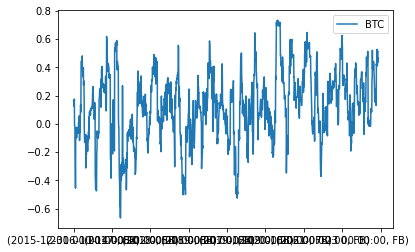

In [69]:
test = get_correlation("FB")
test.plot()

In [679]:
# for year in years_for_analysis:
#     index_year = year[15:19]
#     #df_list[index_year] = {}
#     temp_df = pd.DataFrame()
#     temp_df['Year'] = ""
#     if int(year[15:19]) < 2022:
#         start = year[15:19] + "-01-01"
#         end = year[15:19] + "-12-31"
#     else:
#         start = year[15:19] + "-01-01"
#         end = year[15:19] + "-04-19"
#     year_df = closing_prices.loc[start:end]
#     year_df = year_df.pct_change().dropna()
   
#     for stock in tickers:
#         stock_column = stock
#         #key = index_year + "_" + stock_column + "_BTC"
#         stock_df = pd.DataFrame()
#         stock_df["BTC"] = year_df["BTC"]
#         stock_df[stock_column] = year_df[stock_column]
#         stock_df = stock_df.rolling(window=20).corr().dropna()
#         temp_list = stock_df["BTC"].tolist()
#         for value in temp_list:
#             if value > .99999990:
#                 temp_list.remove(value)
#         temp_df[stock_column + "Corr"] = temp_list

#     temp_df['Year'] = index_year
#     df_list[index_year] = temp_df
    #df_list[index_year]['Year'] = index_year
   
#display(df_list['2017'])
# closing_prices_2016.pct_change().dropna()
# btc_aapl_correlation = pd.DataFrame()
# btc_aapl_correlation["AAPL"] = closing_prices_2016["AAPL"]
# btc_aapl_correlation["BTC"] = closing_prices_2016["BTC"]
# btc_aapl_correlation = btc_aapl_correlation.pct_change().dropna()
# btc_aapl_correlation = btc_aapl_correlation.rolling(window=20).corr()
# btc_aapl_correlation = btc_aapl_correlation.dropna()
# btc_aapl_correlation = btc_aapl_correlation.drop(columns="AAPL")
# btc_aapl_correlation.head(10)

ValueError: Wrong number of items passed 6, placement implies 1

ValueError: If using all scalar values, you must pass an index